## M.A.R.C.H. incident analyses by location

In this analysis, we isolate MARCH raids based on Census tract. Once we join the latitude and longitude points to their respective Census tracts, we'll be able to determine how many other businesses were targeted in the immediate neighborhood surrounding "Friends and Lovers" — its Census tract and all adjacent Census tracts.

The data was downloaded here: https://github.com/gltd/march/tree/master/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp
from shapely.geometry import Point

In [2]:
march_data_lat_long = pd.read_csv(
    '../data/march_raids_with_lat.csv',
    parse_dates=["inspection_date"]
)
len(march_data_lat_long)

2305

In [3]:
march_data_lat_long["inspection_date"].describe(datetime_is_numeric = True)

count                          2305
mean     2014-09-28 09:12:53.101952
min             2012-02-22 00:00:00
25%             2013-05-03 00:00:00
50%             2014-06-27 00:00:00
75%             2016-02-27 00:00:00
max             2017-07-21 00:00:00
Name: inspection_date, dtype: object

In [4]:
march_data_lat_long.head()

,address,borough_name,borough_abbrev,bin_number,block,lot,inspection_date,access_1,ecb_violation_number,dob_violation_number,longitude,latitude
0,1 NAGLE AVENUE,Manhattan,MN,1064121,2171.0,1.0,2015-07-18,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.930469,40.859105
1,10 AKRON STREET,Staten Island,SI,5104032,1546.0,5.0,2013-04-12,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-74.158704,40.611921
2,10 WEST MT EDEN AVENUE,Bronx,BX,2008329,2859.0,44.0,2015-02-07,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.915216,40.844369
3,10-28 BEACH 20 STREET,Queens,QN,4298257,15561.0,13.0,2013-04-19,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.752835,40.603038
4,10-28 BEACH 20 STREET,Queens,QN,4298257,15561.0,13.0,2012-06-16,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.752835,40.603038


Chart what MARCH raids looked like over time. 

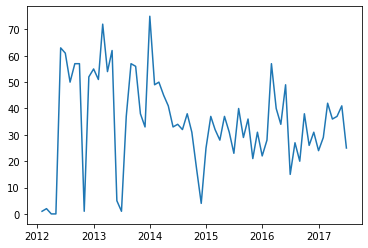

In [5]:
plt.plot(
    march_data_lat_long.set_index(
        "inspection_date"
   )["address"].resample(
        "MS"
    ).count(
    )
)

## Merge MARCH data with Census tracts
This part of the analysis:
* turns  data into geodataframe
* merges MARCH data with Census tract data
* produces a count per Census tract

In [6]:
march_data_lat_long["geometry"]=( 
    march_data_lat_long.apply(lambda z: Point(z["longitude"], z["latitude"]), axis = 1)
)


In [7]:
march_data_lat_long_geodf = gp.GeoDataFrame(march_data_lat_long, crs = "EPSG:4269")

In [8]:
march_data_lat_long_geodf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
march_data_lat_long_geodf.head()

,address,borough_name,borough_abbrev,bin_number,block,lot,inspection_date,access_1,ecb_violation_number,dob_violation_number,longitude,latitude,geometry
0,1 NAGLE AVENUE,Manhattan,MN,1064121,2171.0,1.0,2015-07-18,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.930469,40.859105,POINT (-73.93047 40.85911)
1,10 AKRON STREET,Staten Island,SI,5104032,1546.0,5.0,2013-04-12,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-74.158704,40.611921,POINT (-74.15870 40.61192)
2,10 WEST MT EDEN AVENUE,Bronx,BX,2008329,2859.0,44.0,2015-02-07,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.915216,40.844369,POINT (-73.91522 40.84437)
3,10-28 BEACH 20 STREET,Queens,QN,4298257,15561.0,13.0,2013-04-19,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.752835,40.603038,POINT (-73.75284 40.60304)
4,10-28 BEACH 20 STREET,Queens,QN,4298257,15561.0,13.0,2012-06-16,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.752835,40.603038,POINT (-73.75284 40.60304)


### Read in the polygon data of New York City Census tracts
- read in the NY Census tracts
- filter it down to NYC Census tracts

In [10]:
ny_state_tracts = (
    gp.read_file(
        "../data/censusTracts/states/tl_2019_36_NY_tract/tl_2019_36_tract.shp"
    )
)

ny_state_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,36,081,044800,36081044800,448,Census Tract 448,G5020,S,208002,0,+40.7110219,-073.8026344,"POLYGON ((-73.80646 40.71206, -73.80556 40.712..."
1,36,081,045800,36081045800,458,Census Tract 458,G5020,S,245281,0,+40.7152626,-073.7909261,"POLYGON ((-73.79364 40.71382, -73.79362 40.713..."
2,36,081,046200,36081046200,462,Census Tract 462,G5020,S,249611,0,+40.7098547,-073.7879749,"POLYGON ((-73.79203 40.71107, -73.79101 40.711..."
3,36,081,046300,36081046300,463,Census Tract 463,G5020,S,159415,0,+40.7440007,-073.8710900,"POLYGON ((-73.87468 40.74335, -73.87423 40.743..."
4,36,081,046400,36081046400,464,Census Tract 464,G5020,S,228767,0,+40.7168637,-073.7869958,"POLYGON ((-73.79187 40.71379, -73.79085 40.714..."


In [11]:
NYC_COUNTIES = [
    "005", # Bronx
    "047", # Kings (Brooklyn)
    "061", # New York County (Manhattan)
    "081", # Queens
    "085", # Richmond (Staten Island)
]

In [12]:
nyc_census_tracts = ny_state_tracts[
    ny_state_tracts['COUNTYFP'].isin(NYC_COUNTIES)
]

In [13]:
len(nyc_census_tracts)

2167

### Find number of raids per tract and other Census data
* Merge geodataframes and a Census tract to each MARCH incident
* import data from a previous analysis of NYC Census tracts and merge with MARCH data (more is [here](https://github.com/BuzzFeedNews/2020-02-gentrification)). Data includes historical demographic information, median home value, median income and calculations on whether a tract had gentrified between 2000 and 2017.

In [14]:
merged_gdf = gp.sjoin(
    nyc_census_tracts,
    march_data_lat_long_geodf,
    how = "inner"
)

In [15]:
merged_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,borough_abbrev,bin_number,block,lot,inspection_date,access_1,ecb_violation_number,dob_violation_number,longitude,latitude
1,36,081,045800,36081045800,458,Census Tract 458,G5020,S,245281,0,...,QN,4210594,9844.0,110.0,2015-02-28,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.789768,40.712252
1,36,081,045800,36081045800,458,Census Tract 458,G5020,S,245281,0,...,QN,4210594,9844.0,110.0,2014-02-28,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.789768,40.712252
1,36,081,045800,36081045800,458,Census Tract 458,G5020,S,245281,0,...,QN,4210593,9844.0,101.0,2014-08-15,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.789203,40.712368
1,36,081,045800,36081045800,458,Census Tract 458,G5020,S,245281,0,...,QN,4210593,9844.0,101.0,2014-03-01,MARCH: NO PA PERMIT/ECB NOV ISSUED,35090900P,NaN,-73.789203,40.712368
1,36,081,045800,36081045800,458,Census Tract 458,G5020,S,245281,0,...,QN,4210593,9844.0,101.0,2013-08-09,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.789203,40.712368


In [16]:
march_raids_per_tract = (
    merged_gdf
    .groupby([
        "GEOID",
    ])
    .size()
    .to_frame("raids")
    .reset_index()
)

print(len(march_raids_per_tract))
march_raids_per_tract.head(20)

635


,GEOID,raids
0,36005001900,2
1,36005002500,12
2,36005002702,1
3,36005003900,2
4,36005004300,2
5,36005004800,2
6,36005005002,14
7,36005005100,8
8,36005005200,1
9,36005005400,1


In [17]:
march_raids_per_tract["GEOID"].value_counts().sort_values(ascending=False)

36005002702    1
36047009600    1
36047049700    1
36061028300    1
36081014201    1
              ..
36081039900    1
36061009500    1
36005034800    1
36085006700    1
36061005600    1
Name: GEOID, Length: 635, dtype: int64

### Merge demographic data with MARCH raid counts

In [18]:
gentrification = pd.read_csv(
    "../data/gentrification.csv",
    dtype={"GEOID":str}
)

gentrification.head()

,GEOID,name,total_population_17,total_population_25_over_17,median_income_17,median_home_value_17,educational_attainment_17,white_alone_17,black_alone_17,native_alone_17,...,pct_asian_alone_change,pct_native_alone_17,pct_native_alone_00,pct_native_alone_change,pct_native_hawaiian_pacific_islander_17,pct_native_hawaiian_pacific_islander_00,pct_native_hawaiian_pacific_islander_change,pct_hispanic_or_latino_17,pct_hispanic_or_latino_00,pct_hispanic_or_latino_change
0,13089020100,"Census Tract 201, DeKalb County, Georgia",2076,1455.0,174526.0,617300.0,1231.0,1885.0,36.0,0.0,...,-0.647,0.00,0.224,-0.224,0.0,0.0,0.0,4.576,10.768,-6.192
1,13089020200,"Census Tract 202, DeKalb County, Georgia",2045,1657.0,87889.0,548200.0,1271.0,1596.0,187.0,0.0,...,2.299,0.00,0.546,-0.546,0.0,0.0,0.0,5.281,3.092,2.189
2,13089020300,"Census Tract 203, DeKalb County, Georgia",4151,2934.0,113088.0,470300.0,2344.0,3612.0,146.0,27.0,...,0.539,0.65,0.522,0.128,0.0,0.0,0.0,3.589,2.210,1.379
3,13089020400,"Census Tract 204, DeKalb County, Georgia",2574,1891.0,78681.0,433000.0,1584.0,2251.0,74.0,0.0,...,3.014,0.00,0.517,-0.517,0.0,0.0,0.0,2.875,3.341,-0.466
4,13089020500,"Census Tract 205, DeKalb County, Georgia",3305,2685.0,55208.0,239600.0,1220.0,1596.0,1286.0,0.0,...,2.593,0.00,0.062,-0.062,0.0,0.0,0.0,5.446,2.935,2.511


In [19]:
gentrification.columns

Index(['GEOID', 'name', 'total_population_17', 'total_population_25_over_17',
       'median_income_17', 'median_home_value_17', 'educational_attainment_17',
       'white_alone_17', 'black_alone_17', 'native_alone_17', 'asian_alone_17',
       'native_hawaiian_pacific_islander_17', 'some_other_race_alone',
       'two_or_more', 'hispanic_or_latino_17', 'city', 'metro_area', 'state',
       'county', 'tract', 'total_population_00', 'white_alone_00',
       'black_alone_00', 'native_alone_00', 'asian_alone_00',
       'native_hawaiian_pacific_islander_00', 'hispanic_or_latino_00',
       'total_population_25_over_00', 'median_income_00',
       'median_home_value_00', 'educational_attainment_00',
       'educational_attainment_pct_17', 'educational_attainment_pct_00',
       'educational_attainment_change', 'home_pct_change',
       'metro_median_income_00_q40', 'metro_median_home_value_00_q40',
       'educational_attainment_change_q66', 'home_pct_change_q66',
       'low_population', 

In [20]:
gentrification_targets = pd.merge(
    gentrification,
    march_raids_per_tract,
    on="GEOID"
)

print(len(gentrification), len(gentrification_targets))

2799 635


In [21]:
gentrification_targets.head()

,GEOID,name,total_population_17,total_population_25_over_17,median_income_17,median_home_value_17,educational_attainment_17,white_alone_17,black_alone_17,native_alone_17,...,pct_native_alone_17,pct_native_alone_00,pct_native_alone_change,pct_native_hawaiian_pacific_islander_17,pct_native_hawaiian_pacific_islander_00,pct_native_hawaiian_pacific_islander_change,pct_hispanic_or_latino_17,pct_hispanic_or_latino_00,pct_hispanic_or_latino_change,raids
0,36005001900,"Census Tract 19, Bronx County, New York",2817,1837.0,40117.0,375000.0,420.0,218.0,932.0,0.0,...,0.000,0.568,-0.568,0.0,0.0,0.0,53.390,62.311,-8.921,2
1,36005002500,"Census Tract 25, Bronx County, New York",5760,3466.0,22771.0,493300.0,310.0,141.0,1161.0,27.0,...,0.469,0.196,0.273,0.0,0.0,0.0,76.684,79.037,-2.353,12
2,36005002702,"Census Tract 27.02, Bronx County, New York",4538,2415.0,13216.0,NaN,178.0,80.0,1460.0,64.0,...,1.410,0.211,1.199,0.0,0.0,0.0,65.580,74.894,-9.314,1
3,36005003900,"Census Tract 39, Bronx County, New York",6473,3815.0,30357.0,222100.0,343.0,443.0,1034.0,39.0,...,0.603,0.066,0.537,0.0,0.0,0.0,77.182,78.794,-1.612,2
4,36005004300,"Census Tract 43, Bronx County, New York",6190,3706.0,22940.0,424500.0,316.0,5.0,1597.0,35.0,...,0.565,0.271,0.294,0.0,0.0,0.0,71.018,77.532,-6.514,2


In [22]:
gentrification_targets.head()

,GEOID,name,total_population_17,total_population_25_over_17,median_income_17,median_home_value_17,educational_attainment_17,white_alone_17,black_alone_17,native_alone_17,...,pct_native_alone_17,pct_native_alone_00,pct_native_alone_change,pct_native_hawaiian_pacific_islander_17,pct_native_hawaiian_pacific_islander_00,pct_native_hawaiian_pacific_islander_change,pct_hispanic_or_latino_17,pct_hispanic_or_latino_00,pct_hispanic_or_latino_change,raids
0,36005001900,"Census Tract 19, Bronx County, New York",2817,1837.0,40117.0,375000.0,420.0,218.0,932.0,0.0,...,0.000,0.568,-0.568,0.0,0.0,0.0,53.390,62.311,-8.921,2
1,36005002500,"Census Tract 25, Bronx County, New York",5760,3466.0,22771.0,493300.0,310.0,141.0,1161.0,27.0,...,0.469,0.196,0.273,0.0,0.0,0.0,76.684,79.037,-2.353,12
2,36005002702,"Census Tract 27.02, Bronx County, New York",4538,2415.0,13216.0,NaN,178.0,80.0,1460.0,64.0,...,1.410,0.211,1.199,0.0,0.0,0.0,65.580,74.894,-9.314,1
3,36005003900,"Census Tract 39, Bronx County, New York",6473,3815.0,30357.0,222100.0,343.0,443.0,1034.0,39.0,...,0.603,0.066,0.537,0.0,0.0,0.0,77.182,78.794,-1.612,2
4,36005004300,"Census Tract 43, Bronx County, New York",6190,3706.0,22940.0,424500.0,316.0,5.0,1597.0,35.0,...,0.565,0.271,0.294,0.0,0.0,0.0,71.018,77.532,-6.514,2


In [23]:
gentrification_targets.columns

Index(['GEOID', 'name', 'total_population_17', 'total_population_25_over_17',
       'median_income_17', 'median_home_value_17', 'educational_attainment_17',
       'white_alone_17', 'black_alone_17', 'native_alone_17', 'asian_alone_17',
       'native_hawaiian_pacific_islander_17', 'some_other_race_alone',
       'two_or_more', 'hispanic_or_latino_17', 'city', 'metro_area', 'state',
       'county', 'tract', 'total_population_00', 'white_alone_00',
       'black_alone_00', 'native_alone_00', 'asian_alone_00',
       'native_hawaiian_pacific_islander_00', 'hispanic_or_latino_00',
       'total_population_25_over_00', 'median_income_00',
       'median_home_value_00', 'educational_attainment_00',
       'educational_attainment_pct_17', 'educational_attainment_pct_00',
       'educational_attainment_change', 'home_pct_change',
       'metro_median_income_00_q40', 'metro_median_home_value_00_q40',
       'educational_attainment_change_q66', 'home_pct_change_q66',
       'low_population', 

In [24]:
merged_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,borough_abbrev,bin_number,block,lot,inspection_date,access_1,ecb_violation_number,dob_violation_number,longitude,latitude
1,36,081,045800,36081045800,458,Census Tract 458,G5020,S,245281,0,...,QN,4210594,9844.0,110.0,2015-02-28,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.789768,40.712252
1,36,081,045800,36081045800,458,Census Tract 458,G5020,S,245281,0,...,QN,4210594,9844.0,110.0,2014-02-28,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.789768,40.712252
1,36,081,045800,36081045800,458,Census Tract 458,G5020,S,245281,0,...,QN,4210593,9844.0,101.0,2014-08-15,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.789203,40.712368
1,36,081,045800,36081045800,458,Census Tract 458,G5020,S,245281,0,...,QN,4210593,9844.0,101.0,2014-03-01,MARCH: NO PA PERMIT/ECB NOV ISSUED,35090900P,NaN,-73.789203,40.712368
1,36,081,045800,36081045800,458,Census Tract 458,G5020,S,245281,0,...,QN,4210593,9844.0,101.0,2013-08-09,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.789203,40.712368


### Find raids near Friends and Lovers

In this part of the analysis, we identify raids in near Friends and Lovers. The geographical scope of this analysis includes raids in the Census tract where the bar Friends and Lovers is located as well as every adjacent Census tract. This list was then used to do on-the-ground reporting. 

Census tract IDs were found here: https://popfactfinder.planning.nyc.gov/#14/40.67871/-73.95851
GEOIDs were then constructed based on Census Bureau conventions: https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html

In [25]:
census_tracts = [
    "36047020100",
    "36047022700",
    "36047020300", # ode to babel
    "36047020500",
    "36047020700",
    "36047021500",
    "36047021700",
    "36047021900",
    "36047022100",
    "36047024700",
    "36047030500" # friends and lovers 
]


pared_down_raids = merged_gdf[merged_gdf["GEOID"].isin(census_tracts)]

print(len(pared_down_raids))
pared_down_raids.head()

36


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,borough_abbrev,bin_number,block,lot,inspection_date,access_1,ecb_violation_number,dob_violation_number,longitude,latitude
1197,36,047,022700,36047022700,227,Census Tract 227,G5020,S,240700,0,...,BK,3057707,2016.0,22.0,2013-11-15,MARCH: FAILURE TO MAINTAIN BLDG/ECB NOV ISSUED,35064942Y,NaN,-73.957403,40.681220
1197,36,047,022700,36047022700,227,Census Tract 227,G5020,S,240700,0,...,BK,3057707,2016.0,22.0,2015-06-28,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.957403,40.681220
1197,36,047,022700,36047022700,227,Census Tract 227,G5020,S,240700,0,...,BK,3420462,1996.0,7503.0,2017-02-25,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.954224,40.683398
1209,36,047,022100,36047022100,221,Census Tract 221,G5020,S,152083,0,...,BK,3030920,1225.0,8.0,2016-12-10,MARCH: OCCUPANCY CONTRARY TO C OF O/NONE/ECB N...,35213315L,121016CERFC02,-73.953205,40.675154
2249,36,047,020100,36047020100,201,Census Tract 201,G5020,S,175379,0,...,BK,3057634,2014.0,17.0,2013-11-16,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.963014,40.682424


In [26]:
pared_down_raids["GEOID"].value_counts()

36047030500    12
36047021700     8
36047020300     7
36047022700     3
36047024700     3
36047020100     2
36047022100     1
Name: GEOID, dtype: int64

In [27]:

neighborhoodraids=(
    pd.merge(
        pared_down_raids,
        gentrification_targets, 
        on="GEOID"
    )
    [[
        'GEOID',
        'NAME',
        'address',
        'inspection_date', 
        'access_1',
        'ecb_violation_number', 
        'dob_violation_number', 
        'longitude', 
        'latitude',
        'total_population_17',
        'median_income_17', 
        'median_home_value_17', 
        'educational_attainment_17',
        'white_alone_17', 
        'black_alone_17', 
        'native_alone_17', 
        'asian_alone_17',
        'native_hawaiian_pacific_islander_17', 
        'some_other_race_alone',
        'two_or_more', 
        'hispanic_or_latino_17',
        'educational_attainment_pct_17',
        'educational_attainment_change', 
        'home_pct_change',
        'pct_white_alone_17',  'pct_white_alone_change',
        'pct_black_alone_17', 'pct_black_alone_change',
        'pct_asian_alone_17',  'pct_asian_alone_change',
        'pct_native_alone_17',  'pct_native_alone_change',
        'pct_native_hawaiian_pacific_islander_17',
        'pct_native_hawaiian_pacific_islander_change',
        'pct_hispanic_or_latino_17', 
        'pct_hispanic_or_latino_change', 'raids' 
    ]]
)

len(neighborhoodraids)

36

In [28]:
neighborhoodraids.to_csv("../output/neighborhood_raids.csv", index=False)

In [29]:
neighborhoodraids.columns

Index(['GEOID', 'NAME', 'address', 'inspection_date', 'access_1',
       'ecb_violation_number', 'dob_violation_number', 'longitude', 'latitude',
       'total_population_17', 'median_income_17', 'median_home_value_17',
       'educational_attainment_17', 'white_alone_17', 'black_alone_17',
       'native_alone_17', 'asian_alone_17',
       'native_hawaiian_pacific_islander_17', 'some_other_race_alone',
       'two_or_more', 'hispanic_or_latino_17', 'educational_attainment_pct_17',
       'educational_attainment_change', 'home_pct_change',
       'pct_white_alone_17', 'pct_white_alone_change', 'pct_black_alone_17',
       'pct_black_alone_change', 'pct_asian_alone_17',
       'pct_asian_alone_change', 'pct_native_alone_17',
       'pct_native_alone_change', 'pct_native_hawaiian_pacific_islander_17',
       'pct_native_hawaiian_pacific_islander_change',
       'pct_hispanic_or_latino_17', 'pct_hispanic_or_latino_change', 'raids'],
      dtype='object')

In [30]:
neighborhoodraids.head(5)

,GEOID,NAME,address,inspection_date,access_1,ecb_violation_number,dob_violation_number,longitude,latitude,total_population_17,...,pct_black_alone_change,pct_asian_alone_17,pct_asian_alone_change,pct_native_alone_17,pct_native_alone_change,pct_native_hawaiian_pacific_islander_17,pct_native_hawaiian_pacific_islander_change,pct_hispanic_or_latino_17,pct_hispanic_or_latino_change,raids
0,36047022700,227,1088 FULTON STREET,2013-11-15,MARCH: FAILURE TO MAINTAIN BLDG/ECB NOV ISSUED,35064942Y,NaN,-73.957403,40.681220,3556,...,-32.250,3.375,1.790,0.000,-0.294,0.309,0.309,7.593,0.752,3
1,36047022700,227,1088 FULTON STREET,2015-06-28,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.957403,40.681220,3556,...,-32.250,3.375,1.790,0.000,-0.294,0.309,0.309,7.593,0.752,3
2,36047022700,227,1188 BEDFORD AVENUE,2017-02-25,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.954224,40.683398,3556,...,-32.250,3.375,1.790,0.000,-0.294,0.309,0.309,7.593,0.752,3
3,36047022100,221,1401 BEDFORD AVENUE,2016-12-10,MARCH: OCCUPANCY CONTRARY TO C OF O/NONE/ECB N...,35213315L,121016CERFC02,-73.953205,40.675154,4174,...,-41.273,4.432,3.846,1.485,1.154,0.000,0.000,12.266,2.134,1
4,36047020100,201,946 FULTON STREET,2013-11-16,MARCH: NO ENFORCEMENT ACTION TAKEN,NaN,NaN,-73.963014,40.682424,3735,...,-36.572,4.471,1.112,0.000,-0.110,0.000,0.000,10.415,2.761,2


### Find a list of the most raided bars in the Census tracts surrounding "Friends and Lovers"

In [31]:
neighborhoodraids["address"].value_counts()

778 FRANKLIN AVENUE    7
990 ATLANTIC AVENUE    6
960 ATLANTIC AVENUE    6
566 NOSTRAND AVENUE    3
899 BERGEN STREET      2
1088 FULTON STREET     2
1401 BEDFORD AVENUE    1
559 GRAND AVENUE       1
946 FULTON STREET      1
676 FRANKLIN AVENUE    1
617 GRAND AVENUE       1
856 ATLANTIC AVENUE    1
766 FRANKLIN AVENUE    1
1065 PACIFIC STREET    1
1188 BEDFORD AVENUE    1
15 PUTNAM AVENUE       1
Name: address, dtype: int64

In [32]:
neighborhoodraids["address"].value_counts().to_csv("../output/neighborhood_target_list.csv")

### Some statistics for the neighborhood
- demographic changes for Census tract in which Ode to Babel and Friends and Lovers are 
- to adjust numbers for inflation. The rate of 1.44 came from the [Bureau of Labor Statistics Inflation Calculator](https://www.bls.gov/data/inflation_calculator.htm)


In [33]:
pd.set_option('display.max_rows', None)

gentrification_targets[gentrification_targets["GEOID"] == "36047020300"].T

,147
GEOID,36047020300
name,"Census Tract 203, Kings County, New York"
total_population_17,1764
total_population_25_over_17,1300
median_income_17,103571
median_home_value_17,918600
educational_attainment_17,833
white_alone_17,675
black_alone_17,496
native_alone_17,0


* demographic changes for Census tract where Friends and Lovers is

In [34]:
gentrification_targets[gentrification_targets["GEOID"] == "36047030500"].T

,167
GEOID,36047030500
name,"Census Tract 305, Kings County, New York"
total_population_17,6267
total_population_25_over_17,5310
median_income_17,70125
median_home_value_17,544800
educational_attainment_17,3034
white_alone_17,2483
black_alone_17,2471
native_alone_17,0


In [35]:
friends_lovers_tract =gentrification_targets[gentrification_targets["GEOID"] == "36047030500"]

median_home_value_increase = ( 
    (friends_lovers_tract["median_home_value_17"] - (friends_lovers_tract["median_home_value_00"]* 1.44))/
    (friends_lovers_tract["median_home_value_00"]* 1.44)
)

print(median_home_value_increase)

167    1.675686
dtype: float64


In [36]:
print(
    "median_home_value_00: ", friends_lovers_tract["median_home_value_00"]* 1.44,
    "median_home_value_17: ", friends_lovers_tract["median_home_value_17"], 
    "median_income_00: ", friends_lovers_tract["median_income_00"]* 1.44,
    "median_income_17: ", friends_lovers_tract["median_income_17"], 
)

median_home_value_00:  167    203611.354848
Name: median_home_value_00, dtype: float64 median_home_value_17:  167    544800.0
Name: median_home_value_17, dtype: float64 median_income_00:  167    40796.666395
Name: median_income_00, dtype: float64 median_income_17:  167    70125.0
Name: median_income_17, dtype: float64


In [37]:
gentrification_targets.columns

Index(['GEOID', 'name', 'total_population_17', 'total_population_25_over_17',
       'median_income_17', 'median_home_value_17', 'educational_attainment_17',
       'white_alone_17', 'black_alone_17', 'native_alone_17', 'asian_alone_17',
       'native_hawaiian_pacific_islander_17', 'some_other_race_alone',
       'two_or_more', 'hispanic_or_latino_17', 'city', 'metro_area', 'state',
       'county', 'tract', 'total_population_00', 'white_alone_00',
       'black_alone_00', 'native_alone_00', 'asian_alone_00',
       'native_hawaiian_pacific_islander_00', 'hispanic_or_latino_00',
       'total_population_25_over_00', 'median_income_00',
       'median_home_value_00', 'educational_attainment_00',
       'educational_attainment_pct_17', 'educational_attainment_pct_00',
       'educational_attainment_change', 'home_pct_change',
       'metro_median_income_00_q40', 'metro_median_home_value_00_q40',
       'educational_attainment_change_q66', 'home_pct_change_q66',
       'low_population', 

### Noise complaints analysis

This part of the analysis looks at noise complaints affiliated with Ode To Babel's address. 

In the cells we will:
- identify types of complaints that are relevant (noise)

The data was downloaded from this portal with `772 Dean Street`, the bar's address, being a filter:
https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data

In [38]:
complaints = pd.read_csv(
    "../data/311-complaints_772_deanstreet.csv",
    parse_dates = ["Created Date"]
)

len(complaints)

220

In [39]:
complaints.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                               object
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [40]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,47067063,2020-08-02 10:58:56,08/02/2020 11:08:28 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11238.0,772 DEAN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679474,-73.964574,"(40.6794737, -73.9645739)"
1,47058732,2020-08-01 13:35:57,08/01/2020 01:50:22 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11238.0,772 DEAN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679474,-73.964574,"(40.6794737, -73.9645739)"
2,47048119,2020-07-31 23:38:55,08/14/2020 02:51:57 PM,MAYOR?S OFFICE OF SPECIAL ENFORCEMENT,Mayor?s Office of Special Enforcement,NonCompliance with Phased Reopening,Business not in compliance,Store/Commercial,11238.0,772 DEAN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679474,-73.964574,"(40.6794737, -73.9645739)"
3,46926376,2020-07-20 20:12:00,07/20/2020 08:12:00 PM,DEP,Department of Environmental Protection,Water System,Fire Hydrant Emergency (FHE),NaN,11238.0,772 DEAN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679474,-73.964574,"(40.6794737, -73.9645739)"
4,38375835,2018-02-04 00:16:31,02/04/2018 01:18:39 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11238.0,772 DEAN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679474,-73.964574,"(40.6794737, -73.9645739)"


In [41]:
complaints["Complaint Type"].value_counts()

Noise - Commercial                     182
Noise - Street/Sidewalk                 10
Rodent                                   5
Noise - Residential                      4
General Construction/Plumbing            3
Derelict Vehicles                        2
Urinating in Public                      2
Food Establishment                       2
New Tree Request                         2
Emergency Response Team (ERT)            1
NonCompliance with Phased Reopening      1
Missed Collection (All Materials)        1
Drinking                                 1
Water System                             1
Overgrown Tree/Branches                  1
Plumbing                                 1
Building/Use                             1
Name: Complaint Type, dtype: int64

In [42]:
noise_complaints = complaints[ complaints["Complaint Type"].str.contains("Noise")]
len(noise_complaints)

196

In [43]:
noise_complaints["Created Date"].describe(datetime_is_numeric = True)

count                              196
mean     2018-11-15 08:32:42.025510400
min                2015-09-25 23:21:10
25%      2018-03-28 11:47:45.750000128
50%                2019-03-13 14:48:02
75%      2019-08-18 19:08:05.249999872
max                2020-08-02 10:58:56
Name: Created Date, dtype: object

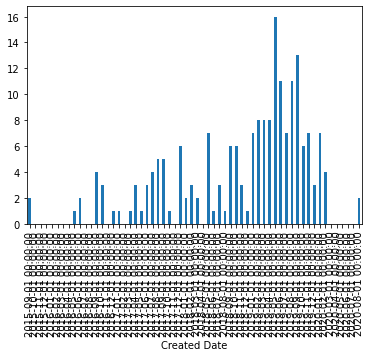

In [44]:
(
    noise_complaints
    .groupby(pd.Grouper(
        key = "Created Date",
        freq = "MS"
    ))
    .size()
    .plot.bar()
)

In [45]:
noise_complaints.set_index(
        "Created Date"
)["Incident Address"].resample(
    "MS"
).count(
).to_csv(
    "../output/noise_complaints_ode_to_babel.csv"
)